**Using Evaluation Utils**:

In this notebook, we discuss how to use the provided utilities file to compare models on numerous metrics on different problems at the same time

In [1]:
import evaluation
import load_data
import Padgan_variants
import utils
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import Padgan_variants
import VAEs

C:\Users\Lyle\Documents\Files\DeCoDE\DGM-Evaluation-Metrics\Padgan_variants.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Setting up DGMS**:

Let's create a pandas series with several DGMs

In [2]:
reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, False])

C:\Users\Lyle\AppData\Local\Temp\ipykernel_10868\3495058523.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()


**Setting up Problems**

The utilities provided expect each function to be specified as a list of the following components:
- Sampling function
- Validity test
- Objectives
- Plotting Range
- Conditioning Function 
- Condition Value

Unused components can be left as None

In [3]:
functions=[]

DM_val = load_data.all_val_wrapper()

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func_1 = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
sampling_func_2 = load_data.sample_circle_blobs_wrapper(10000, 2, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])

functions.append([sampling_func_1, DM_val, None, rangearr, None, None])
functions.append([sampling_func_2, DM_val, None, rangearr, None, None])

**Setting Up Metrics**:
We set up teh metrics we want to evaluate in a pandas series. 
Each entry consists of:
metrics["name"] = ["direction", metric wrapper]

- name is a name you are assigning to the metrics
- direction is either "minimize" or "maximize"
- metric wrapper is the a wrapper function of the desired metric with any hyperparameters specified

In [4]:
metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper("x")]

C:\Users\Lyle\AppData\Local\Temp\ipykernel_10868\3187865464.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


**General Parameters**

We set up some flags and general settings:

In [5]:
numgen = 1000 #Number of samples to generate
numinst = 3 #Number of instantiations to test
scaling = True #Scale or not
scorebars = True #Print progress bars for scoring functions

np.random.seed(0)

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

**fit_and_generate**
We call fit_and_generate from the utilities file to generate the datasets and train the models. 
fit_and_generate takes:
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- numinst: How many model instantiations to test
- numgen: How many points to sample from each generated model
- scaling: Whether to scale the datasets before training
- obj_status: #wheteher we are considering functional performance
- conditional_status: Whether we are considering conditioning
- holdout: fraction of dataset to hold out during training (used for rediscovery)

The fit_and_generate function returns a timestamp in a string corresponding to the folder in which the results are saved. 

In [6]:
timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, 0)

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7251 - reconstruction_loss: 0.3586 - kl_loss: 2.2842
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1975 - reconstruction_loss: 0.0529 - kl_loss: 2.8120
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1879 - reconstruction_loss: 0.0500 - kl_loss: 2.7395
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1830 - reconstruction_loss: 0.0482 - kl_loss: 2.6718
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1793 - reconstruction_loss: 0.0471 - kl_loss: 2.5877
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1752 - reconstruction_loss: 0.0455 - kl_loss: 2.5620
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1739 - reconstruction_loss: 0.0466 - kl_loss: 2.5096
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1684 - reconstruction_loss: 0

79/79 [==============================] - 1s 7ms/step - loss: 0.1590 - reconstruction_loss: 0.0374 - kl_loss: 2.4304
Epoch 65/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1607 - reconstruction_loss: 0.0392 - kl_loss: 2.4259
Epoch 66/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1615 - reconstruction_loss: 0.0391 - kl_loss: 2.4556
Epoch 67/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1596 - reconstruction_loss: 0.0363 - kl_loss: 2.4640
Epoch 68/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1583 - reconstruction_loss: 0.0379 - kl_loss: 2.4293
Epoch 69/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1604 - reconstruction_loss: 0.0364 - kl_loss: 2.4602
Epoch 70/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1610 - reconstruction_loss: 0.0368 - kl_loss: 2.4656
Epoch 71/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1626 - reconstruction_loss: 0.0381

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7335 - reconstruction_loss: 0.3744 - kl_loss: 2.2221
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.2081 - reconstruction_loss: 0.0575 - kl_loss: 2.8252
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1878 - reconstruction_loss: 0.0512 - kl_loss: 2.6741
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1804 - reconstruction_loss: 0.0475 - kl_loss: 2.6322
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1790 - reconstruction_loss: 0.0462 - kl_loss: 2.5914
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1729 - reconstruction_loss: 0.0448 - kl_loss: 2.5503
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1726 - reconstruction_loss: 0.0435 - kl_loss: 2.5481
Epoch 8/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1703 - reconstruction_loss: 0

79/79 [==============================] - 0s 6ms/step - loss: 0.1666 - reconstruction_loss: 0.0396 - kl_loss: 2.5139
Epoch 65/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1652 - reconstruction_loss: 0.0393 - kl_loss: 2.5243
Epoch 66/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1665 - reconstruction_loss: 0.0393 - kl_loss: 2.5179
Epoch 67/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1655 - reconstruction_loss: 0.0404 - kl_loss: 2.5035
Epoch 68/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1665 - reconstruction_loss: 0.0411 - kl_loss: 2.4992
Epoch 69/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1668 - reconstruction_loss: 0.0401 - kl_loss: 2.5310
Epoch 70/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1657 - reconstruction_loss: 0.0396 - kl_loss: 2.5570
Epoch 71/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1647 - reconstruction_loss: 0.0406

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 7ms/step - loss: 0.7176 - reconstruction_loss: 0.3424 - kl_loss: 2.3595
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2089 - reconstruction_loss: 0.0561 - kl_loss: 2.8702
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1901 - reconstruction_loss: 0.0513 - kl_loss: 2.7171
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1810 - reconstruction_loss: 0.0473 - kl_loss: 2.6442
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1796 - reconstruction_loss: 0.0463 - kl_loss: 2.6378
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1730 - reconstruction_loss: 0.0451 - kl_loss: 2.5424
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1737 - reconstruction_loss: 0.0451 - kl_loss: 2.5235
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1745 - reconstruction_loss: 0

79/79 [==============================] - 0s 6ms/step - loss: 0.1594 - reconstruction_loss: 0.0372 - kl_loss: 2.4605
Epoch 65/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1597 - reconstruction_loss: 0.0366 - kl_loss: 2.4436
Epoch 66/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1589 - reconstruction_loss: 0.0379 - kl_loss: 2.4422
Epoch 67/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1622 - reconstruction_loss: 0.0362 - kl_loss: 2.5068
Epoch 68/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1583 - reconstruction_loss: 0.0374 - kl_loss: 2.4359
Epoch 69/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1595 - reconstruction_loss: 0.0386 - kl_loss: 2.4169
Epoch 70/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1599 - reconstruction_loss: 0.0360 - kl_loss: 2.4459
Epoch 71/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1609 - reconstruction_loss: 0.0369

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 9ms/step - loss: 0.7960 - reconstruction_loss: 0.4183 - kl_loss: 2.2215
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2309 - reconstruction_loss: 0.0708 - kl_loss: 3.0320
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2065 - reconstruction_loss: 0.0589 - kl_loss: 2.7921
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1797 - reconstruction_loss: 0.0482 - kl_loss: 2.5801
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1733 - reconstruction_loss: 0.0469 - kl_loss: 2.5297
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1765 - reconstruction_loss: 0.0471 - kl_loss: 2.5592
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1737 - reconstruction_loss: 0.0451 - kl_loss: 2.5552
Epoch 8/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1729 - reconstruction_loss: 0

79/79 [==============================] - 1s 6ms/step - loss: 0.1679 - reconstruction_loss: 0.0391 - kl_loss: 2.5449
Epoch 65/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1655 - reconstruction_loss: 0.0394 - kl_loss: 2.5072
Epoch 66/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1658 - reconstruction_loss: 0.0383 - kl_loss: 2.5410
Epoch 67/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1649 - reconstruction_loss: 0.0398 - kl_loss: 2.5338
Epoch 68/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1697 - reconstruction_loss: 0.0392 - kl_loss: 2.5518
Epoch 69/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1659 - reconstruction_loss: 0.0394 - kl_loss: 2.5200
Epoch 70/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1678 - reconstruction_loss: 0.0385 - kl_loss: 2.5722
Epoch 71/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1644 - reconstruction_loss: 0.0395

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7086 - reconstruction_loss: 0.3452 - kl_loss: 2.2589
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1974 - reconstruction_loss: 0.0530 - kl_loss: 2.8224
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1886 - reconstruction_loss: 0.0502 - kl_loss: 2.7272
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1833 - reconstruction_loss: 0.0485 - kl_loss: 2.6546
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1773 - reconstruction_loss: 0.0467 - kl_loss: 2.5660
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1742 - reconstruction_loss: 0.0451 - kl_loss: 2.5498
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1698 - reconstruction_loss: 0.0456 - kl_loss: 2.4795
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1699 - reconstruction_loss: 0

79/79 [==============================] - 1s 8ms/step - loss: 0.1622 - reconstruction_loss: 0.0387 - kl_loss: 2.4240
Epoch 65/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1572 - reconstruction_loss: 0.0369 - kl_loss: 2.3906
Epoch 66/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1593 - reconstruction_loss: 0.0368 - kl_loss: 2.4540
Epoch 67/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1566 - reconstruction_loss: 0.0370 - kl_loss: 2.3849
Epoch 68/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1574 - reconstruction_loss: 0.0371 - kl_loss: 2.4199
Epoch 69/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1583 - reconstruction_loss: 0.0386 - kl_loss: 2.3864
Epoch 70/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1562 - reconstruction_loss: 0.0364 - kl_loss: 2.4299
Epoch 71/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1589 - reconstruction_loss: 0.0369

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7309 - reconstruction_loss: 0.3566 - kl_loss: 2.3124
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.2084 - reconstruction_loss: 0.0584 - kl_loss: 2.8024
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1860 - reconstruction_loss: 0.0513 - kl_loss: 2.6570
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1806 - reconstruction_loss: 0.0498 - kl_loss: 2.5829
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1747 - reconstruction_loss: 0.0458 - kl_loss: 2.5586
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1752 - reconstruction_loss: 0.0482 - kl_loss: 2.5202
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1812 - reconstruction_loss: 0.0460 - kl_loss: 2.5895
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1706 - reconstruction_loss: 0

79/79 [==============================] - 0s 5ms/step - loss: 0.1650 - reconstruction_loss: 0.0390 - kl_loss: 2.5189
Epoch 65/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1659 - reconstruction_loss: 0.0385 - kl_loss: 2.5520
Epoch 66/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1631 - reconstruction_loss: 0.0390 - kl_loss: 2.5537
Epoch 67/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1637 - reconstruction_loss: 0.0396 - kl_loss: 2.5227
Epoch 68/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1669 - reconstruction_loss: 0.0393 - kl_loss: 2.5690
Epoch 69/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1678 - reconstruction_loss: 0.0401 - kl_loss: 2.5271
Epoch 70/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1652 - reconstruction_loss: 0.0383 - kl_loss: 2.5742
Epoch 71/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1663 - reconstruction_loss: 0.0405

**score**:
Next, we score the generated models. The scroring utilities function takes:
- timestr: the timestring corresponding to the results we want to evaluate
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- metrics: The metrics to test
- numinst: How many model instantiations to test
- scaling: Whether to scale the datasets before training 
- cond_dist: Whether conditional metrics are compared against conditional or marginal distribution
- scorebars: Whether to print progress bars/ evaluation status

score saves scores in the folder indicated by timestr.

In [7]:
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)

Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.72it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.63it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.68it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.68it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.48it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.59it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.58it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.54it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.11it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.36it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.20it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.15it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.06it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.23it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.11it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.24it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.70it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.72it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.78it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.79it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.47it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.52it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.44it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.39it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.13it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.12it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.22it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.09it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.24it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.31it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.18it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.18it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.91it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.79it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.83it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.96it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.60it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.57it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.53it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.48it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.20it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.27it/s]


Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.23it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.27it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.25it/s]


Calculating Maximum Mean Discrepancy


Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.015±0.001,0.046±0.009
Nearest Generated Sample,0.087±0.014,0.094±0.004
F1,0.525±0.044,0.530±0.026
F10,0.957±0.004,0.888±0.025
F0.1,0.803±0.086,0.760±0.011
AUC-PR,0.565±0.055,0.522±0.048
MMD,0.006±0.002,0.056±0.005


Problem 2 Scores:,GAN,VAE
Nearest Dataset Sample,0.020±0.001,0.049±0.004
Nearest Generated Sample,0.067±0.017,0.179±0.016
F1,0.777±0.069,0.676±0.006
F10,0.989±0.003,0.880±0.006
F0.1,0.980±0.008,0.796±0.012
AUC-PR,0.886±0.059,0.643±0.010
MMD,0.027±0.016,0.054±0.001


Average scores:,GAN,VAE
Nearest Dataset Sample,0.018±0.003,0.047±0.007
Nearest Generated Sample,0.077±0.018,0.136±0.044
F1,0.651±0.139,0.603±0.075
F10,0.973±0.016,0.884±0.019
F0.1,0.892±0.107,0.778±0.022
AUC-PR,0.726±0.171,0.583±0.070
MMD,0.017±0.016,0.055±0.004


**plot_all**:
Next, we plot the generated distributions. The plotting function takes:

- timestr: the timestring corresponding to the results we want to evaluate
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- numinst: How many model instantiations to test
- scaling: Whether to scale the datasets before training 
- validity_status:whether we are considering constraints
- obj_status: whether we are considering functional performance
- conditional_status: whether we are considering conditioning
- cond_dist: Whether conditional metrics are compared against conditional or marginal distribution

plot saves plots in the folder indicated by timestr. If numinst is greater than 1, saves an animation of the plots

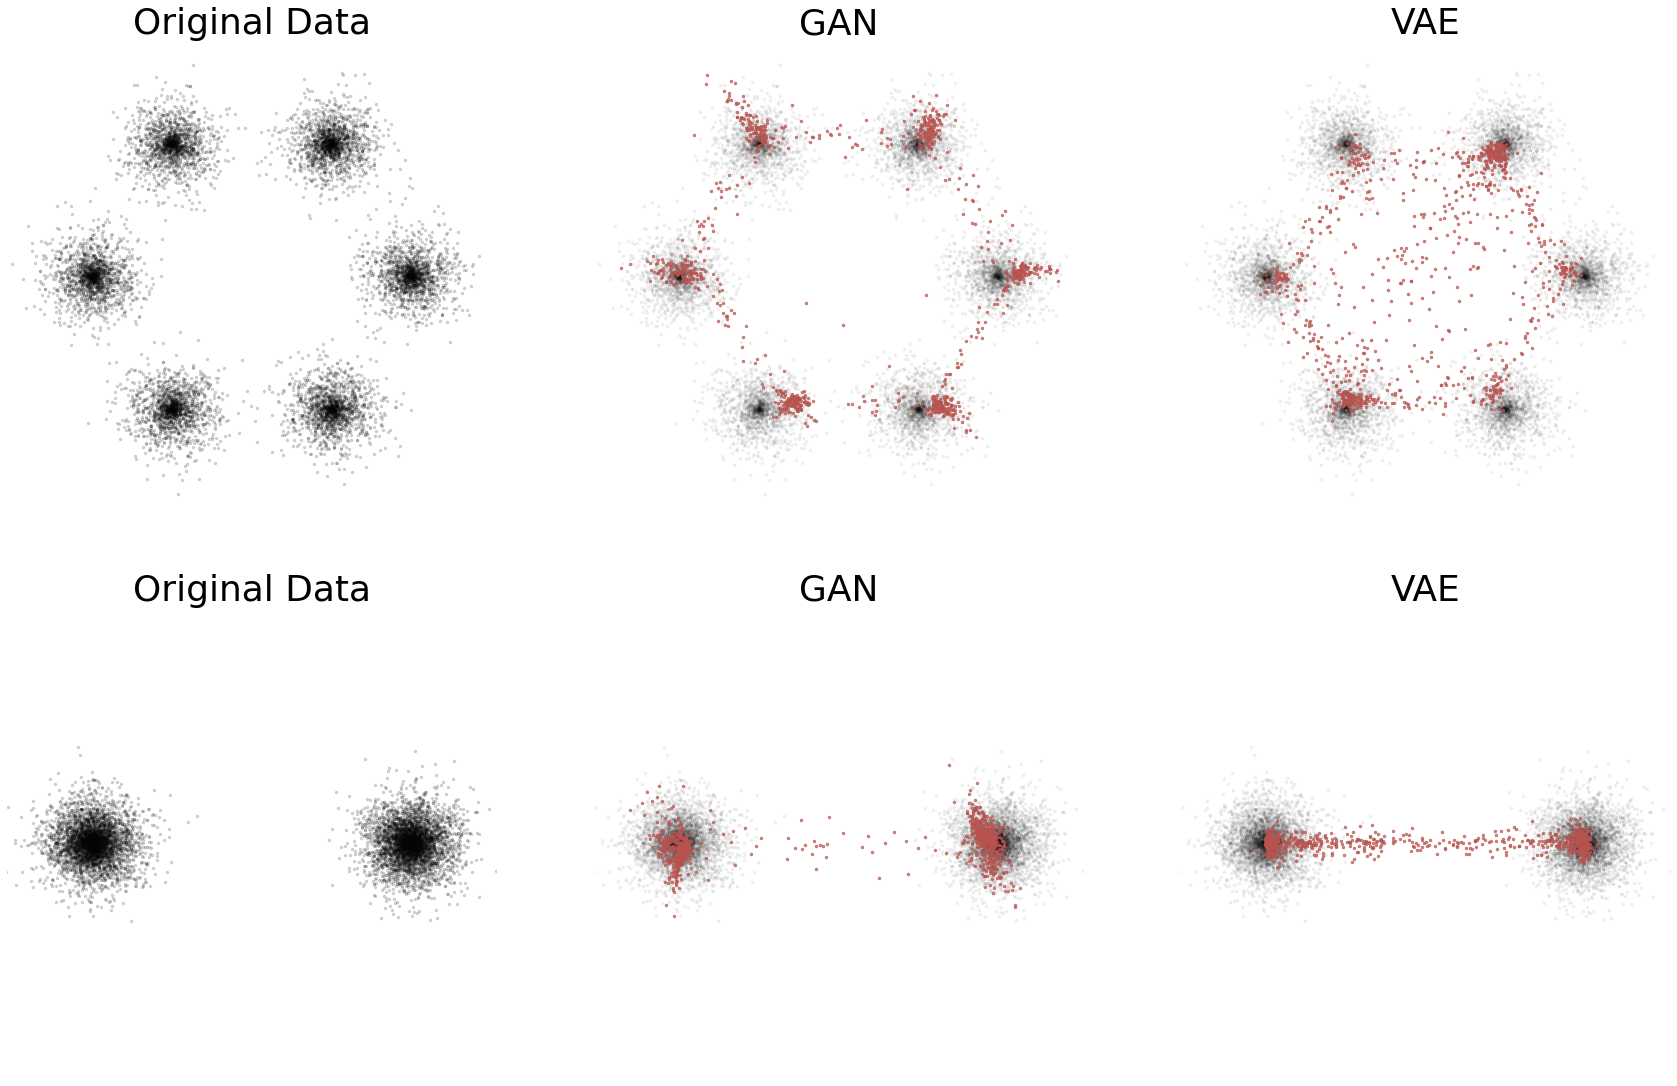

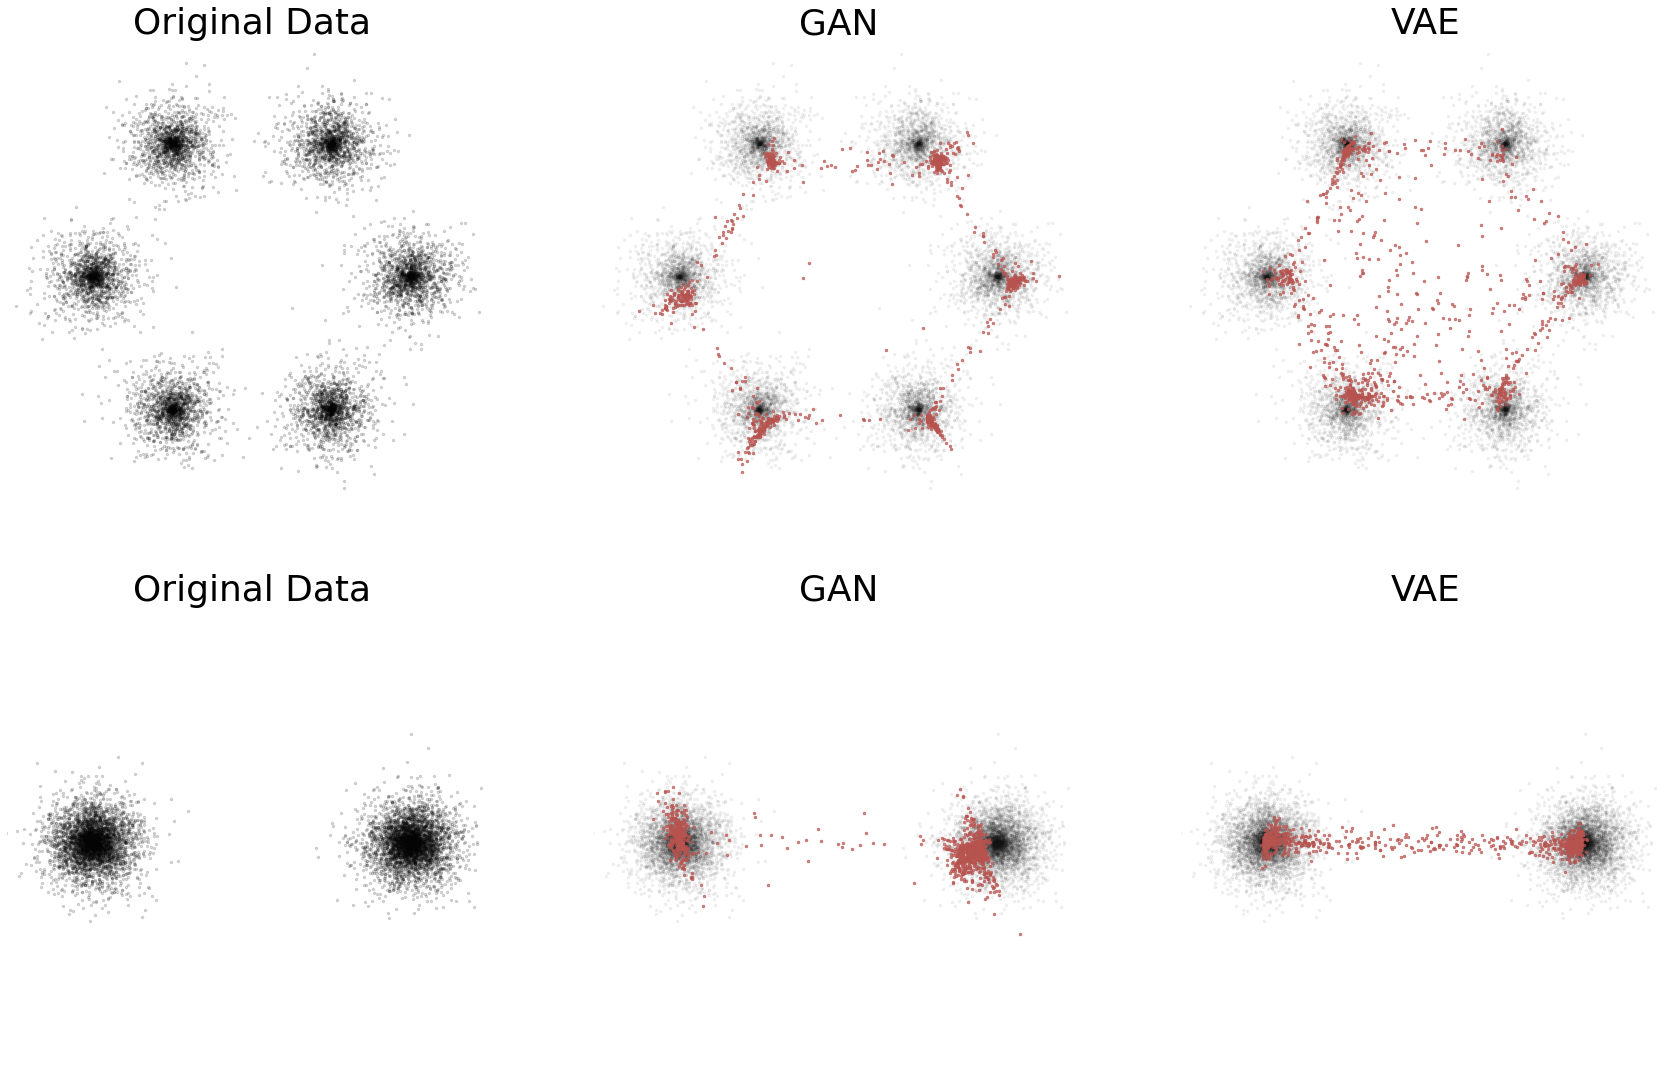

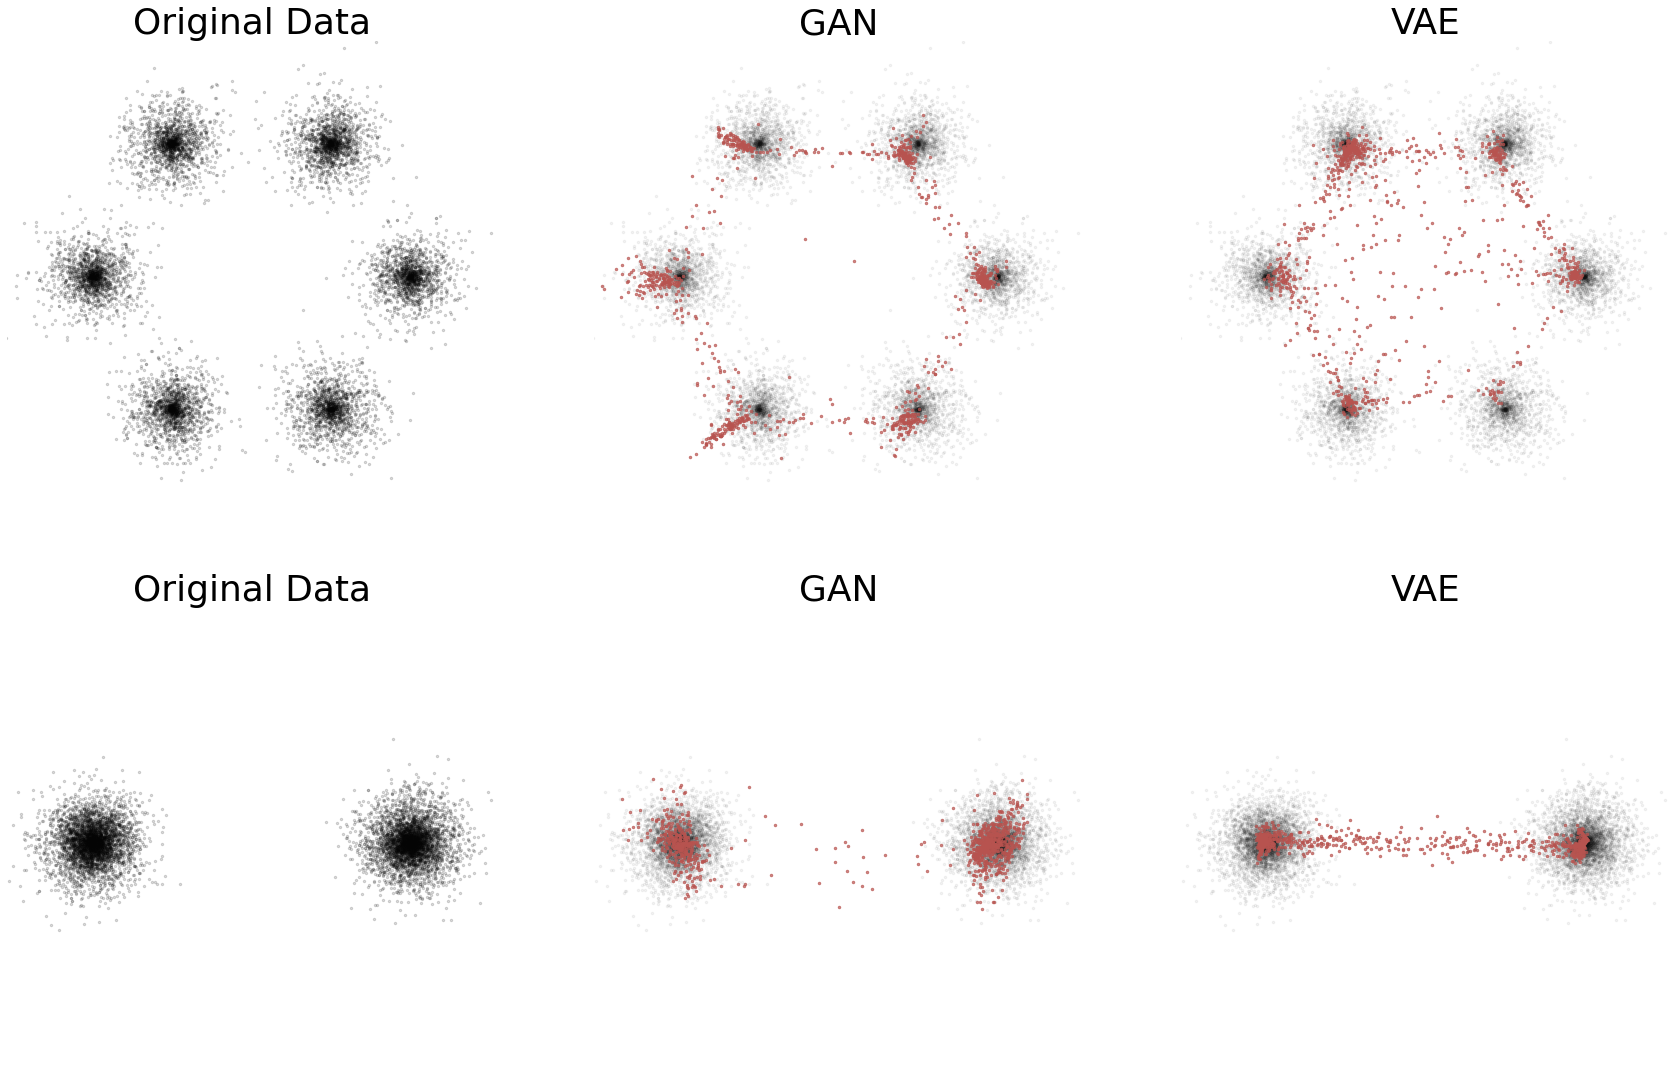

C:\Users\Lyle\anaconda3\envs\tf29\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (91068800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [8]:
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "red")

**Special Metrics**

When working with a few special types of metrics we must do some special setup. For rediscovery, we must designate a holdout fraction which we pass to fit_and_generate. For ML efficacy, we must include an auxiliary predictive task. In this case, we encode this predictive task in an objective function. Objectives are also used when considering performance attributes of designs.

In [9]:
#Rediscovery needs special handling in the utils file. 
#We pass in a special flag: "Rediscovery" to trigger this handling. See utils file for more info
metrics["Rediscovery"] = ["minimize", "Rediscovery", evaluation.data_gen_distance_wrapper("x", "min")]
holdout = 0.05 #If using rediscovery, we need to hold out a portion of the data during training

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score

metrics["ML Efficacy"] = ["maximize", evaluation.ML_efficacy_wrapper(KNeighborsRegressor(n_neighbors=5), r2_score)]

In [10]:
print(metrics)

Nearest Dataset Sample      [minimize, <function gen_data_distance_wrapper...
Nearest Generated Sample    [minimize, <function data_gen_distance_wrapper...
F1                          [maximize, <function F_wrapper.<locals>.calc_p...
F10                         [maximize, <function F_wrapper.<locals>.calc_p...
F0.1                        [maximize, <function F_wrapper.<locals>.calc_p...
AUC-PR                      [maximize, <function AUC_wrapper.<locals>.calc...
MMD                         [minimize, <function MMD_wrapper.<locals>.MMD ...
Rediscovery                 [minimize, Rediscovery, <function data_gen_dis...
ML Efficacy                 [maximize, <function ML_efficacy_wrapper.<loca...
dtype: object


In [11]:
functions=[]

DM_val = load_data.all_val_wrapper()

#In this case, we include objectives specifically for ML efficacy
DM_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func_1 = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
sampling_func_2 = load_data.sample_circle_blobs_wrapper(10000, 2, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])

functions.append([sampling_func_1, DM_val, DM_objs, rangearr, None, None])
functions.append([sampling_func_2, DM_val, DM_objs, rangearr, None, None])

In [12]:
timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout)

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 9ms/step - loss: 0.7358 - reconstruction_loss: 0.3667 - kl_loss: 2.1979
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1998 - reconstruction_loss: 0.0543 - kl_loss: 2.8111
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1863 - reconstruction_loss: 0.0499 - kl_loss: 2.7142
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1823 - reconstruction_loss: 0.0479 - kl_loss: 2.6536
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1760 - reconstruction_loss: 0.0461 - kl_loss: 2.5883
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1732 - reconstruction_loss: 0.0463 - kl_loss: 2.5444
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1700 - reconstruction_loss: 0.0462 - kl_loss: 2.5025
Epoch 8/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1692 - reconstruction_loss: 0

75/75 [==============================] - 1s 8ms/step - loss: 0.1602 - reconstruction_loss: 0.0373 - kl_loss: 2.4704
Epoch 65/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1591 - reconstruction_loss: 0.0379 - kl_loss: 2.4550
Epoch 66/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1607 - reconstruction_loss: 0.0377 - kl_loss: 2.4427
Epoch 67/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1611 - reconstruction_loss: 0.0377 - kl_loss: 2.4515
Epoch 68/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1600 - reconstruction_loss: 0.0369 - kl_loss: 2.4298
Epoch 69/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1578 - reconstruction_loss: 0.0365 - kl_loss: 2.4458
Epoch 70/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1609 - reconstruction_loss: 0.0375 - kl_loss: 2.4130
Epoch 71/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1598 - reconstruction_loss: 0.0370

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 8ms/step - loss: 0.7392 - reconstruction_loss: 0.3729 - kl_loss: 2.3135
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.2116 - reconstruction_loss: 0.0591 - kl_loss: 2.8367
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1889 - reconstruction_loss: 0.0513 - kl_loss: 2.6786
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1833 - reconstruction_loss: 0.0470 - kl_loss: 2.6552
Epoch 5/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1736 - reconstruction_loss: 0.0438 - kl_loss: 2.5639
Epoch 6/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1762 - reconstruction_loss: 0.0453 - kl_loss: 2.5821
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1717 - reconstruction_loss: 0.0421 - kl_loss: 2.5593
Epoch 8/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1723 - reconstruction_loss: 0

75/75 [==============================] - 1s 8ms/step - loss: 0.1689 - reconstruction_loss: 0.0405 - kl_loss: 2.5496
Epoch 65/100
75/75 [==============================] - 0s 7ms/step - loss: 0.1641 - reconstruction_loss: 0.0397 - kl_loss: 2.5088
Epoch 66/100
75/75 [==============================] - 0s 7ms/step - loss: 0.1649 - reconstruction_loss: 0.0399 - kl_loss: 2.5243
Epoch 67/100
75/75 [==============================] - 0s 7ms/step - loss: 0.1657 - reconstruction_loss: 0.0393 - kl_loss: 2.5468
Epoch 68/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1668 - reconstruction_loss: 0.0407 - kl_loss: 2.5381
Epoch 69/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1686 - reconstruction_loss: 0.0389 - kl_loss: 2.5826
Epoch 70/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1662 - reconstruction_loss: 0.0397 - kl_loss: 2.5448
Epoch 71/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1657 - reconstruction_loss: 0.0405

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 6ms/step - loss: 0.7494 - reconstruction_loss: 0.3814 - kl_loss: 2.2234
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2027 - reconstruction_loss: 0.0541 - kl_loss: 2.8385
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1856 - reconstruction_loss: 0.0491 - kl_loss: 2.7144
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1815 - reconstruction_loss: 0.0472 - kl_loss: 2.6498
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1771 - reconstruction_loss: 0.0453 - kl_loss: 2.6112
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1753 - reconstruction_loss: 0.0451 - kl_loss: 2.5546
Epoch 7/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1725 - reconstruction_loss: 0.0446 - kl_loss: 2.5373
Epoch 8/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1679 - reconstruction_loss: 0

75/75 [==============================] - 1s 7ms/step - loss: 0.1581 - reconstruction_loss: 0.0370 - kl_loss: 2.4305
Epoch 65/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1646 - reconstruction_loss: 0.0380 - kl_loss: 2.4812
Epoch 66/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1592 - reconstruction_loss: 0.0356 - kl_loss: 2.4567
Epoch 67/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1596 - reconstruction_loss: 0.0355 - kl_loss: 2.4453
Epoch 68/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1612 - reconstruction_loss: 0.0364 - kl_loss: 2.4939
Epoch 69/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1591 - reconstruction_loss: 0.0365 - kl_loss: 2.4527
Epoch 70/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1591 - reconstruction_loss: 0.0392 - kl_loss: 2.4095
Epoch 71/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1579 - reconstruction_loss: 0.0357

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.7438 - reconstruction_loss: 0.3684 - kl_loss: 2.3088
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2136 - reconstruction_loss: 0.0604 - kl_loss: 2.8832
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1867 - reconstruction_loss: 0.0513 - kl_loss: 2.6965
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1800 - reconstruction_loss: 0.0470 - kl_loss: 2.6040
Epoch 5/100
75/75 [==============================] - 1s 9ms/step - loss: 0.1772 - reconstruction_loss: 0.0465 - kl_loss: 2.5751
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1735 - reconstruction_loss: 0.0434 - kl_loss: 2.5895
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1734 - reconstruction_loss: 0.0436 - kl_loss: 2.5783
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1730 - reconstruction_loss: 0

75/75 [==============================] - 0s 6ms/step - loss: 0.1688 - reconstruction_loss: 0.0407 - kl_loss: 2.5386
Epoch 65/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1663 - reconstruction_loss: 0.0408 - kl_loss: 2.5227
Epoch 66/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1673 - reconstruction_loss: 0.0393 - kl_loss: 2.5308
Epoch 67/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1689 - reconstruction_loss: 0.0402 - kl_loss: 2.5434
Epoch 68/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1698 - reconstruction_loss: 0.0390 - kl_loss: 2.5836
Epoch 69/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1669 - reconstruction_loss: 0.0384 - kl_loss: 2.5596
Epoch 70/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1661 - reconstruction_loss: 0.0400 - kl_loss: 2.5374
Epoch 71/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1659 - reconstruction_loss: 0.0393

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 8ms/step - loss: 0.7940 - reconstruction_loss: 0.4160 - kl_loss: 2.1018
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1991 - reconstruction_loss: 0.0535 - kl_loss: 2.8321
Epoch 3/100
75/75 [==============================] - 1s 10ms/step - loss: 0.1902 - reconstruction_loss: 0.0495 - kl_loss: 2.7571
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1836 - reconstruction_loss: 0.0486 - kl_loss: 2.6766
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1818 - reconstruction_loss: 0.0476 - kl_loss: 2.6320
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1749 - reconstruction_loss: 0.0453 - kl_loss: 2.5746
Epoch 7/100
75/75 [==============================] - 0s 7ms/step - loss: 0.1731 - reconstruction_loss: 0.0454 - kl_loss: 2.5292
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1683 - reconstruction_loss: 

75/75 [==============================] - 0s 6ms/step - loss: 0.1613 - reconstruction_loss: 0.0361 - kl_loss: 2.5182
Epoch 65/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1597 - reconstruction_loss: 0.0383 - kl_loss: 2.4484
Epoch 66/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1606 - reconstruction_loss: 0.0367 - kl_loss: 2.4707
Epoch 67/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1599 - reconstruction_loss: 0.0374 - kl_loss: 2.4633
Epoch 68/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1608 - reconstruction_loss: 0.0368 - kl_loss: 2.4730
Epoch 69/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1575 - reconstruction_loss: 0.0351 - kl_loss: 2.4490
Epoch 70/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1610 - reconstruction_loss: 0.0371 - kl_loss: 2.4501
Epoch 71/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1628 - reconstruction_loss: 0.0368

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 8ms/step - loss: 0.7294 - reconstruction_loss: 0.3659 - kl_loss: 2.3391
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.2204 - reconstruction_loss: 0.0605 - kl_loss: 2.9088
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1886 - reconstruction_loss: 0.0505 - kl_loss: 2.6804
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1816 - reconstruction_loss: 0.0462 - kl_loss: 2.6413
Epoch 5/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1738 - reconstruction_loss: 0.0454 - kl_loss: 2.5651
Epoch 6/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1753 - reconstruction_loss: 0.0448 - kl_loss: 2.5675
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1693 - reconstruction_loss: 0.0425 - kl_loss: 2.5239
Epoch 8/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1736 - reconstruction_loss: 0

75/75 [==============================] - 1s 8ms/step - loss: 0.1670 - reconstruction_loss: 0.0393 - kl_loss: 2.5466
Epoch 65/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1684 - reconstruction_loss: 0.0413 - kl_loss: 2.5188
Epoch 66/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1670 - reconstruction_loss: 0.0394 - kl_loss: 2.5188
Epoch 67/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1680 - reconstruction_loss: 0.0401 - kl_loss: 2.5546
Epoch 68/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1641 - reconstruction_loss: 0.0385 - kl_loss: 2.5006
Epoch 69/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1647 - reconstruction_loss: 0.0389 - kl_loss: 2.5020
Epoch 70/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1664 - reconstruction_loss: 0.0398 - kl_loss: 2.5365
Epoch 71/100
75/75 [==============================] - 1s 8ms/step - loss: 0.1671 - reconstruction_loss: 0.0381

If we want to generate bar plots of our scores, we can pass the plotscores parameter to the scoring function. Note: Scores will be plotted on the same axis, so may need to be scaled.

Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.74it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.76it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.74it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.77it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.41it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.39it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.39it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.41it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.43it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.45it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.39it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.39it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.47it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.27it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.33it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.93it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.92it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.84it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.90it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.56it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.49it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.59it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.58it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.41it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.34it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.26it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.29it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.26it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.30it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.34it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.93it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  3.09it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  3.02it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.96it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.57it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.60it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.62it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.63it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.17it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.14it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.14it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.10it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.08it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.37it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.43it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:04<00:00,  2.31it/s]


Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy


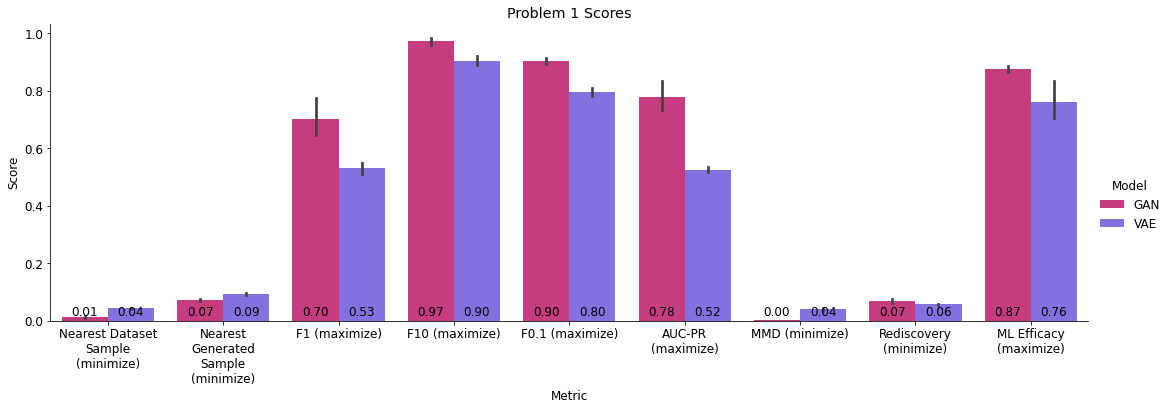

<Figure size 432x288 with 0 Axes>

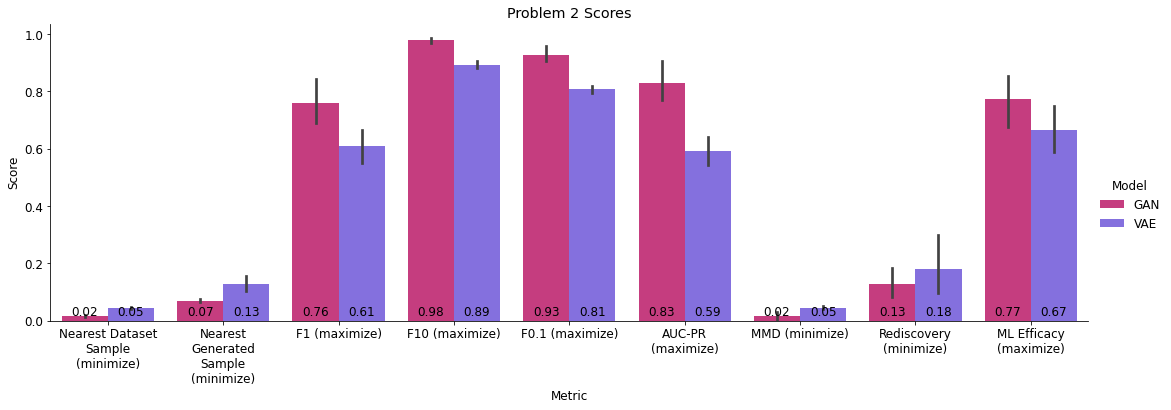

Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.014±0.002,0.043±0.002
Nearest Generated Sample,0.071±0.003,0.093±0.003
F1,0.701±0.053,0.531±0.016
F10,0.972±0.010,0.904±0.013
F0.1,0.905±0.008,0.797±0.012
AUC-PR,0.776±0.042,0.523±0.008
MMD,0.003±0.001,0.041±0.004
Rediscovery,0.069±0.006,0.057±0.002
ML Efficacy,0.875±0.008,0.762±0.053


Problem 2 Scores:,GAN,VAE
Nearest Dataset Sample,0.020±0.003,0.049±0.005
Nearest Generated Sample,0.068±0.008,0.165±0.009
F1,0.817±0.087,0.687±0.015
F10,0.985±0.009,0.884±0.008
F0.1,0.953±0.031,0.819±0.007
AUC-PR,0.883±0.078,0.660±0.006
MMD,0.028±0.019,0.051±0.001
Rediscovery,0.188±0.038,0.304±0.005
ML Efficacy,0.675±0.079,0.571±0.008


Average scores:,GAN,VAE
Nearest Dataset Sample,0.017±0.004,0.046±0.004
Nearest Generated Sample,0.070±0.006,0.129±0.037
F1,0.759±0.093,0.609±0.080
F10,0.978±0.012,0.894±0.015
F0.1,0.929±0.033,0.808±0.015
AUC-PR,0.830±0.082,0.591±0.069
MMD,0.016±0.018,0.046±0.006
Rediscovery,0.129±0.065,0.181±0.123
ML Efficacy,0.775±0.115,0.667±0.103


<Figure size 432x288 with 0 Axes>

In [14]:
import importlib
importlib.reload(utils)
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars, plotscores=True)

**Other Use Cases**

In this notebook, we have demonstrated how to evaluate numerous models on numerous problems in a distribution-matching setting. To evaluate models for other types of problems, such as diversity, constraint satisfaction, performance, and conditioning, please refer to Notebook 3. 